In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os # makes you access your files on hard drive outside the folder


Client_id: Unique id for client
District: District where the client is
Client_catg: Category client belongs to
Region: Area where the client is
Creation_date: Date client joined
Target: fraud:1 , not fraud: 0
Invoice data

Client_id: Unique id for the client
Invoice_date: Date of the invoice
Tarif_type: Type of tax
Counter_number:
Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
Counter_code:
Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
Consommation_level_1: Consumption_level_1
Consommation_level_2: Consumption_level_2
Consommation_level_3: Consumption_level_3
Consommation_level_4: Consumption_level_4
Old_index: Old index
New_index: New index
Months_number: Month number
Counter_type: Type of counter

In [23]:
df_client = pd.read_csv('data/client_train.csv')
df_invoice = pd.read_csv('data/invoice_train.csv')

In [29]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [30]:
df_client.creation_date.unique()

array(['31/12/1994', '29/05/2002', '13/03/1986', ..., '16/08/2004',
       '30/08/1978', '25/05/1978'], dtype=object)

In [31]:
df_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [17]:
df_invoice.reading_remarque.unique()

array([   82,  1200,   123, ..., 43053,  4824,  8314])

In [4]:
df_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [6]:
df = pd.merge(df_client, df_invoice, how='right', on='client_id')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             object 
 2   client_catg           int64  
 3   region                int64  
 4   creation_date         object 
 5   target                float64
 6   invoice_date          object 
 7   tarif_type            int64  
 8   counter_number        int64  
 9   counter_statue        object 
 10  counter_code          int64  
 11  reading_remarque      int64  
 12  counter_coefficient   int64  
 13  consommation_level_1  int64  
 14  consommation_level_2  int64  
 15  consommation_level_3  int64  
 16  consommation_level_4  int64  
 17  old_index             int64  
 18  new_index             int64  
 19  months_number         int64  
 20  counter_type          object 
dtypes: float64(1), int64(15), object(5)
memory usage: 717.3+ MB


In [32]:
df.isnull().sum()

disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [28]:
df.head()

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC


In [35]:
df['difference_index'] = df['new_index'] - df['old_index'] /df['months_number']

In [43]:
df.difference_index.describe()

count    4.476747e+06
mean     1.140868e+04
std      1.879911e+04
min     -9.985390e+05
25%      1.445500e+03
50%      5.634500e+03
75%      1.574125e+04
max      1.743970e+06
Name: difference_index, dtype: float64

<Axes: xlabel='difference_index', ylabel='Count'>

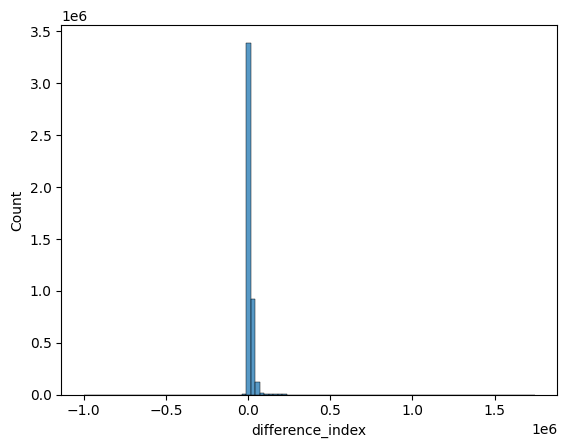

In [42]:
sns.histplot(log(df.difference_index), bins=100)

In [49]:
df[df['difference_index'] < 0 ]

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,difference_index
1120,60,train_Client_100024,11,101,22/03/1985,0.0,2014-06-20,11,482429,0,...,1,800,400,318,0,99260,778,4,ELEC,-24037.000
2818,63,train_Client_10008,11,101,14/09/1987,0.0,2015-05-01,11,842528,0,...,1,800,400,800,363,99486,1849,4,ELEC,-23022.500
5751,60,train_Client_100157,11,101,11/07/2011,0.0,2018-12-02,11,35572,0,...,1,800,400,800,4086,97099,3185,4,ELEC,-21089.750
9104,60,train_Client_100257,11,101,01/10/2007,0.0,2011-01-06,10,7292038,0,...,1,200,421,0,0,9946,567,4,ELEC,-1919.500
20153,69,train_Client_100549,11,104,15/05/1992,0.0,2006-09-21,11,37721,0,...,1,1200,338,0,0,98483,21,4,ELEC,-24599.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458606,69,train_Client_99506,11,104,08/09/1998,0.0,2019-04-15,11,14604,0,...,1,1600,800,1600,1823,97232,3055,8,ELEC,-9099.000
4461423,62,train_Client_99580,12,309,19/06/1990,0.0,2011-03-25,11,10907,0,...,1,1200,1518,0,0,99336,2054,4,ELEC,-22780.000
4461805,60,train_Client_9959,11,101,14/05/1981,0.0,2010-06-18,11,1167412,0,...,1,1200,1491,0,0,98382,1073,4,ELEC,-23522.500
4466699,69,train_Client_99733,11,104,20/01/1986,0.0,2012-03-04,11,800241,0,...,1,4800,3079,0,0,92306,185,16,ELEC,-5584.125
